In [127]:
import psycopg2
import matplotlib.pyplot as plt 
import json

# database handling
conn = psycopg2.connect("dbname=datasets_fun user=postgres password=postgres")

In [128]:
# Fetch data

cur = conn.cursor()
cur.execute("select d.gradska_cetvrt, count(*) as c from dataset d group by d.gradska_cetvrt order by d.gradska_cetvrt")
data = cur.fetchall()


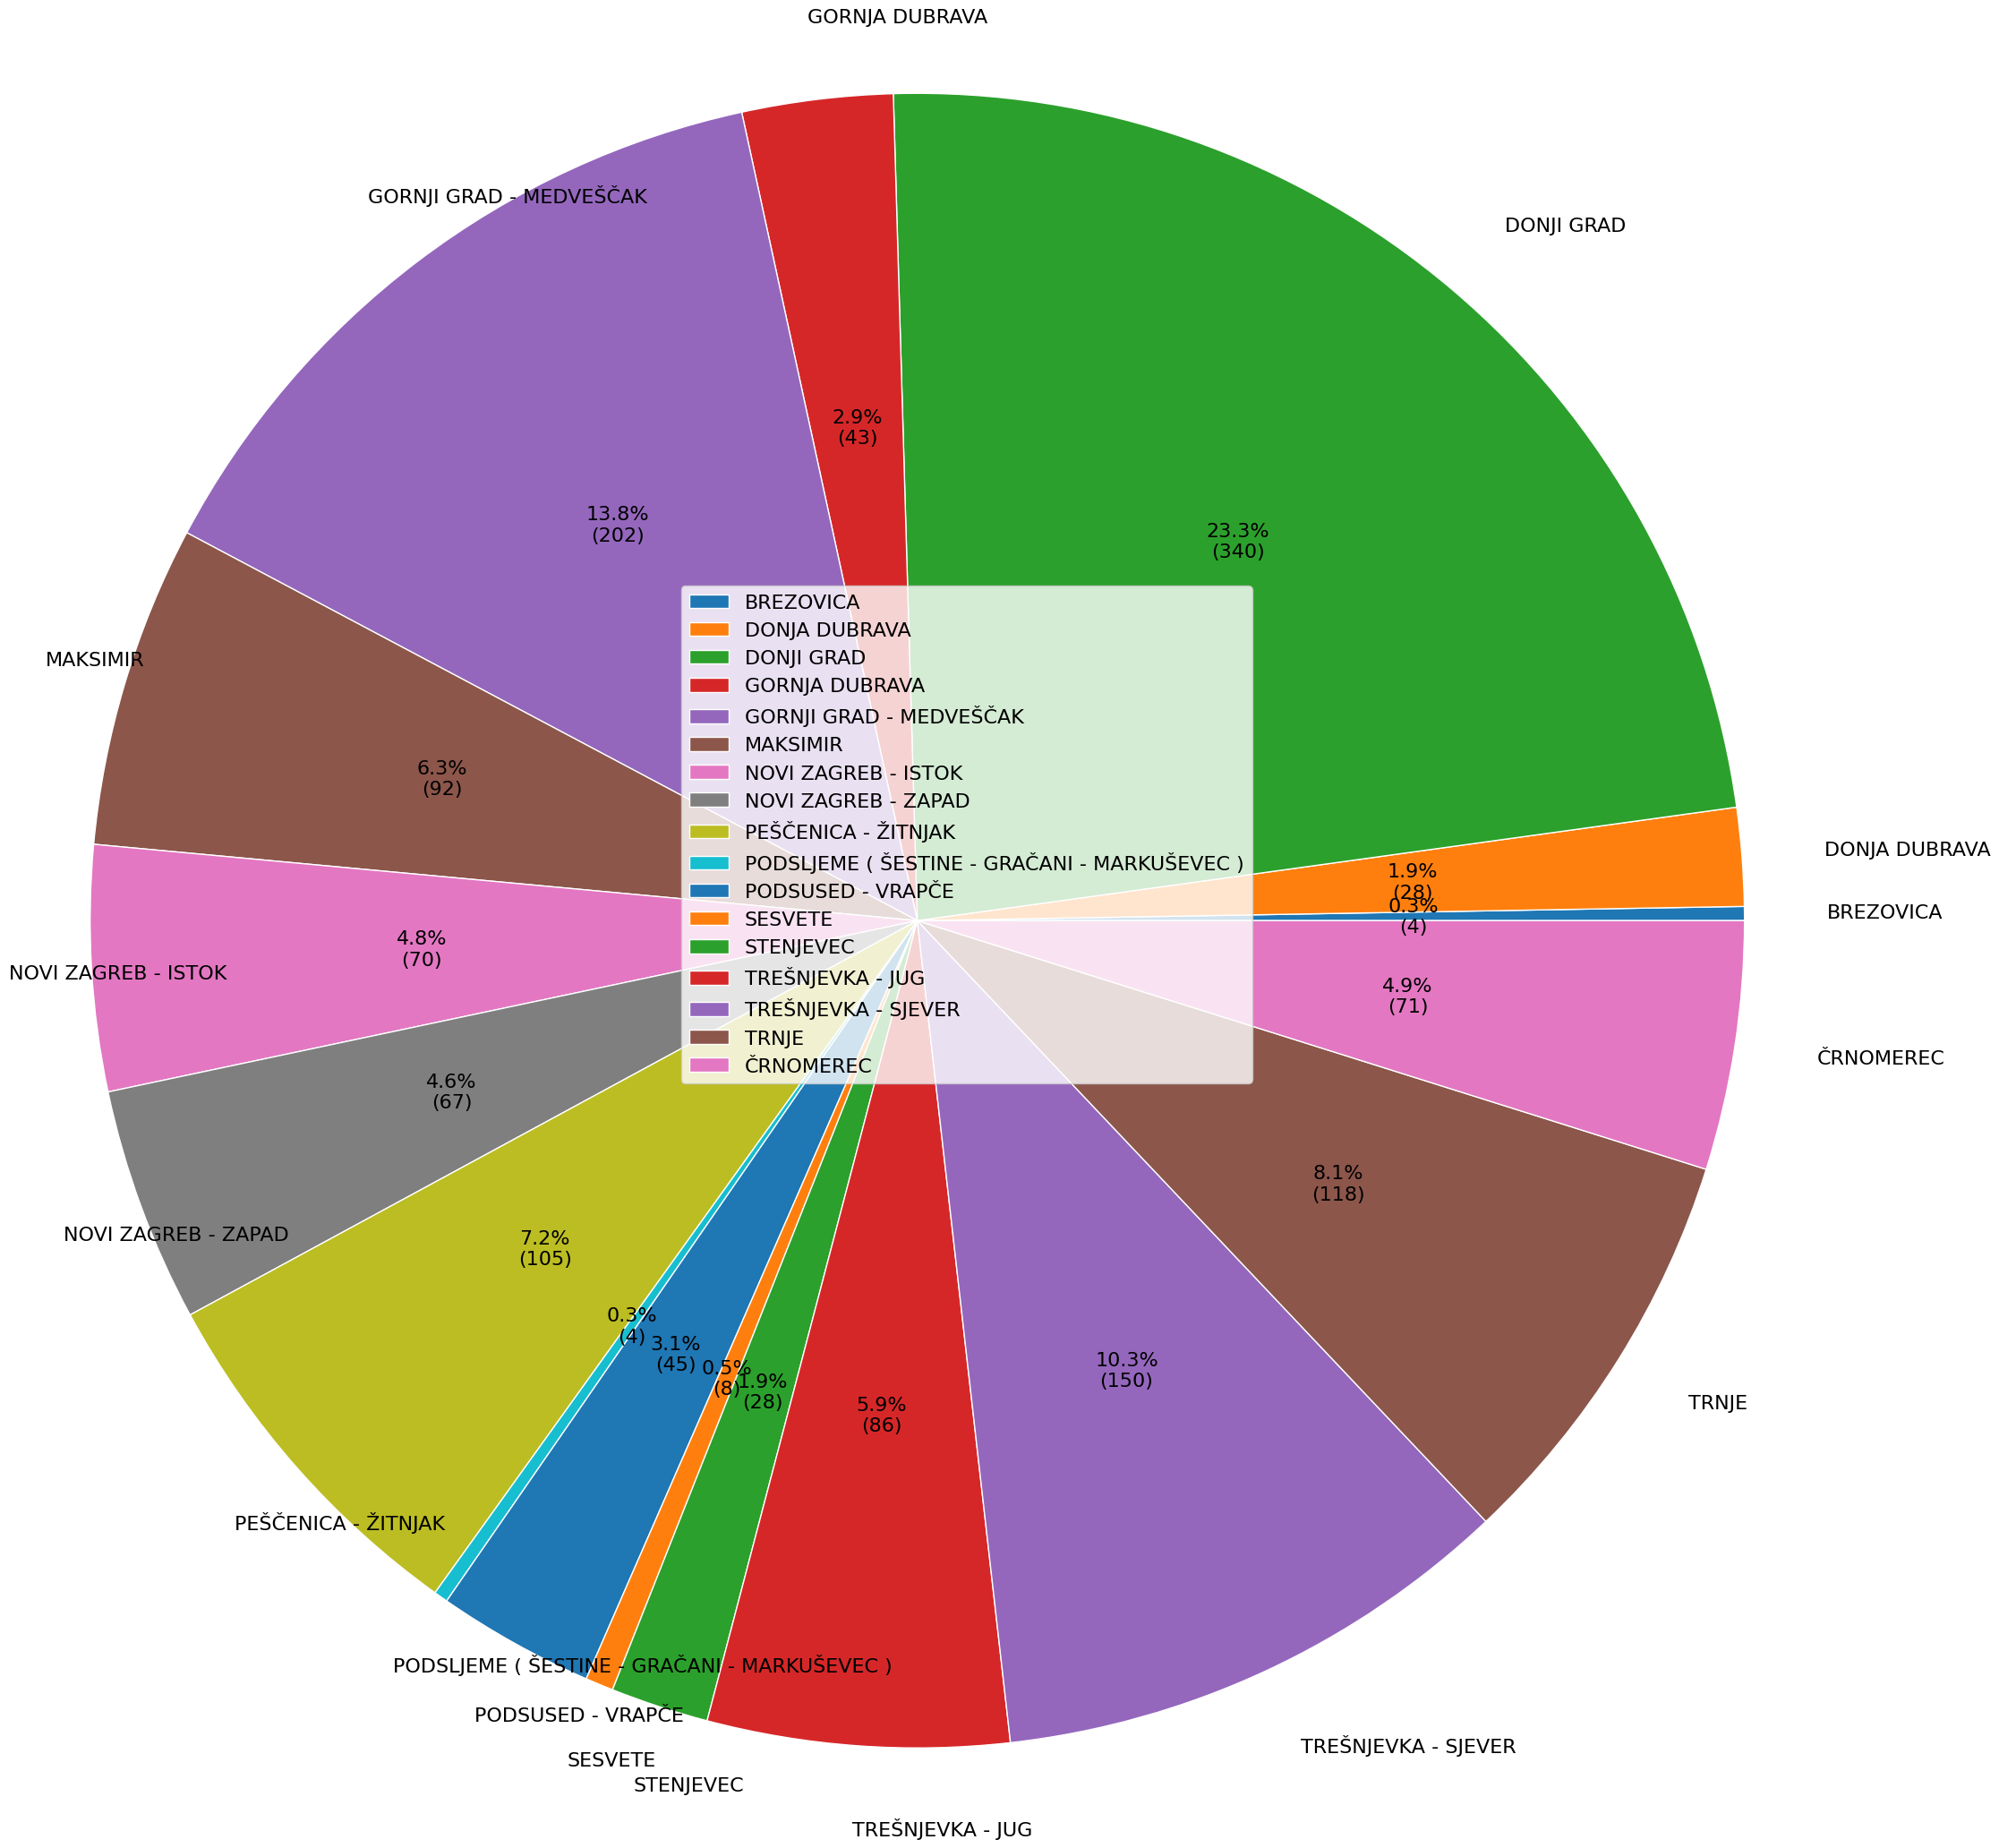

In [129]:
# Display data
plt.rcParams['font.size'] = '16'
data_json = dict(data)
fig, ax = plt.subplots(figsize=(10,10))

def getPct(pct, data_json):
    absolute = int(round(pct/100. * sum(data_json.values())))
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax.pie(data_json.values(),radius=3, center=(4,4), labels=data_json.keys(),autopct= lambda pct: getPct(pct, data_json), wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.legend()
plt.show()